In [398]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,root_mean_squared_log_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [316]:
df = pd.read_csv("train_houses.csv", index_col=0, header=0)

In [317]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [318]:
df.shape

(1460, 80)

In [319]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

In [320]:
na_count_by_variable = df.isna().sum()[df.isna().sum()>0]  # NA values per variable, only for variables that have them
na_count_by_variable

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [321]:
# we need to drop the variables with too many NAs: Alley, MasVnrType, FireplaceQu, PoolQC, Fence, MiscFeature
df = df.drop(columns=['Alley','MasVnrType','FireplaceQu','PoolQC','Fence','MiscFeature'])

In [322]:
df.shape

(1460, 74)

In [323]:
na_count_by_variable = df.isna().sum()[df.isna().sum()>0]
na_count_by_variable

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [324]:
df[na_count_by_variable.keys()].head()

,LotFrontage,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
Id,,,,,,,,,,,,,
1,65.0,196.0,Gd,TA,No,GLQ,Unf,SBrkr,Attchd,2003.0,RFn,TA,TA
2,80.0,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,Attchd,1976.0,RFn,TA,TA
3,68.0,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,Attchd,2001.0,RFn,TA,TA
4,60.0,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Detchd,1998.0,Unf,TA,TA
5,84.0,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,Attchd,2000.0,RFn,TA,TA


In [325]:
# remove rows where the categorical variables have NAs
df = df.dropna(subset=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageQual','GarageCond'])

In [326]:
na_count_by_variable = df.isna().sum()[df.isna().sum()>0]
print(df.shape)
print(na_count_by_variable)

(1346, 74)
LotFrontage    246
MasVnrArea       8
dtype: int64


In [327]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())

In [328]:
na_count_by_variable = df.isna().sum()[df.isna().sum()>0]
print(df.shape)
print(na_count_by_variable)

(1346, 74)
Series([], dtype: int64)


In [329]:
x,y = df.iloc[:,:df.shape[1]-1],df.iloc[:,df.shape[1]-1]

In [330]:
# Selecting only the numeric columns
numeric_cols = x.select_dtypes(include=['float64', 'int64']).columns

# Standardizing the data before calculating VIF
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df[numeric_cols])

# Creating a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_cols
vif_data["VIF"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

# Display VIF data
print(vif_data)

          feature       VIF
0      MSSubClass  1.650836
1     LotFrontage  1.588978
2         LotArea  1.253737
3     OverallQual  3.118603
4     OverallCond  1.665471
5       YearBuilt  6.005030
6    YearRemodAdd  2.586443
7      MasVnrArea  1.396265
8      BsmtFinSF1       inf
9      BsmtFinSF2       inf
10      BsmtUnfSF       inf
11    TotalBsmtSF       inf
12       1stFlrSF       inf
13       2ndFlrSF       inf
14   LowQualFinSF       inf
15      GrLivArea       inf
16   BsmtFullBath  2.242947
17   BsmtHalfBath  1.163148
18       FullBath  3.115201
19       HalfBath  2.249775
20   BedroomAbvGr  2.348744
21   KitchenAbvGr  1.469046
22   TotRmsAbvGrd  4.656518
23     Fireplaces  1.558353
24    GarageYrBlt  4.513786
25     GarageCars  4.166279
26     GarageArea  4.168494
27     WoodDeckSF  1.212413
28    OpenPorchSF  1.247942
29  EnclosedPorch  1.291550
30      3SsnPorch  1.026457
31    ScreenPorch  1.112868
32       PoolArea  1.118968
33        MiscVal  1.026753
34         MoSold  1

c:\Users\Alessio\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [331]:
pd.set_option('display.max_columns', None)

In [332]:
correlation_matrix = pd.DataFrame(x_scaled, columns=vif_data['feature']).corr()

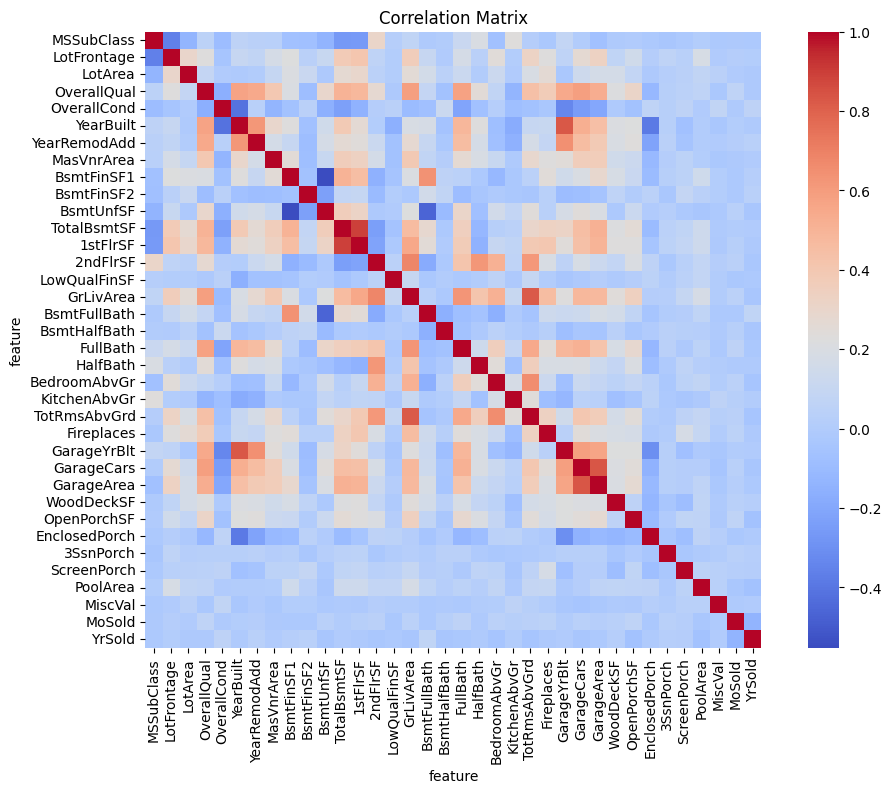

In [333]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [338]:
# Get pairs of highly correlated variables
threshold = 0.8  # Define a threshold for high correlation
correlated_pairs = correlation_matrix.unstack()
correlated_pairs.index.names = ['Variable 1','Variable 2']
correlated_pairs = correlated_pairs.reset_index()
correlated_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Filter the pairs based on the threshold
correlated_pairs = correlated_pairs[
    (abs(correlated_pairs['Correlation']) > threshold) &
    (correlated_pairs['Variable 1'] != correlated_pairs['Variable 2'])
]

print(correlated_pairs)

       Variable 1    Variable 2  Correlation
204     YearBuilt   GarageYrBlt     0.826167
408   TotalBsmtSF      1stFlrSF     0.893812
443      1stFlrSF   TotalBsmtSF     0.893812
562     GrLivArea  TotRmsAbvGrd     0.823553
807  TotRmsAbvGrd     GrLivArea     0.823553
869   GarageYrBlt     YearBuilt     0.826167
926    GarageCars    GarageArea     0.832426
961    GarageArea    GarageCars     0.832426


In [340]:
x = x.drop(columns=['GarageYrBlt','1stFlrSF','GrLivArea','GarageCars'])

In [342]:
x.shape

(1346, 69)

In [364]:
x.dtypes.value_counts()

object     37
int64      30
float64     2
Name: count, dtype: int64

In [369]:
for column in x.select_dtypes(include='object').columns:
    print(f'Value counts for {column}:')
    print(x[column].value_counts())
    print()

Value counts for MSZoning:
MSZoning
RL         1071
RM          191
FV           65
RH           11
C (all)       8
Name: count, dtype: int64

Value counts for Street:
Street
Pave    1341
Grvl       5
Name: count, dtype: int64

Value counts for LotShape:
LotShape
Reg    835
IR1    461
IR2     40
IR3     10
Name: count, dtype: int64

Value counts for LandContour:
LandContour
Lvl    1214
Bnk      52
HLS      48
Low      32
Name: count, dtype: int64

Value counts for Utilities:
Utilities
AllPub    1345
NoSeWa       1
Name: count, dtype: int64

Value counts for LotConfig:
LotConfig
Inside     963
Corner     245
CulDSac     91
FR2         43
FR3          4
Name: count, dtype: int64

Value counts for LandSlope:
LandSlope
Gtl    1273
Mod      61
Sev      12
Name: count, dtype: int64

Value counts for Neighborhood:
Neighborhood
NAmes      209
CollgCr    147
OldTown    100
Somerst     86
Gilbert     78
NridgHt     76
NWAmes      73
Edwards     70
Sawyer      69
SawyerW     54
Crawfor     51
Brk

In [370]:
numeric_cols = x.select_dtypes(include=['float64', 'int64']).columns
x[numeric_cols] = StandardScaler().fit_transform(x[numeric_cols])

In [383]:
categoric_cols = x.select_dtypes(include='object').columns

In [385]:
for column in categoric_cols:

    dummies = pd.get_dummies(x[column], prefix=column, drop_first=True, dtype=int)
    
    x = x.drop(column, axis=1)
    
    for col in dummies.columns:
        x[col] = dummies[col]

C:\Users\Alessio\AppData\Local\Temp\ipykernel_21608\108378563.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x[col] = dummies[col]
C:\Users\Alessio\AppData\Local\Temp\ipykernel_21608\108378563.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  x[col] = dummies[col]
C:\Users\Alessio\AppData\Local\Temp\ipykernel_21608\108378563.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.c

In [388]:
x.shape

(1346, 220)

In [392]:
x.dtypes.value_counts()

int64      188
float64     32
Name: count, dtype: int64

In [394]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [406]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

In [429]:
temp_sum = 0

for i in range(len(y_test)):
    if (y_test.iloc[i] is not None) and (y_pred[i] is not None) and (y_pred[i] > 0):
        temp_sum += (np.log(y_test.iloc[i]) - np.log(y_pred[i]))**2

MSE_log = temp_sum/len(y_test)
RMSE_log = np.sqrt(MSE_log)

print(RMSE_log)

1.912793375140367


In [431]:
np.exp(RMSE_log)

np.float64(6.771979080440417)